# Variando hiperparámetros del modelos para consegir eficiencia


## Modelo de regresión 

### Copiar y pegar el modelo

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

train_data=pd.read_csv("../../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train2 = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train2

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = GaussianNB()
modelo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)


r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")

rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

errores = y_pred - y_test


Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')
(1021, 9)
(438, 9)
(1021,)
(438,)
R^2: 0.5507
MAE: 30328.8311
RMSE: 54705.8440


### Optimización


=== Optimización de hiperparámetros para el modelo de regresión ===
Fitting 5 folds for each of 11 candidates, totalling 55 fits


c:\Users\villa\Desktop\Clases_S7\2.Minería de Datos\3.Proyecto2\InmoValor_SA\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Mejores hiperparámetros encontrados: {'var_smoothing': np.float64(1e-06)}
Mejor puntuación de validación cruzada: 42388.9655 (RMSE)

=== Comparación de modelos ===
R^2 (original): 0.6416 | R^2 (optimizado): 0.6753
MAE (original): 31293.2443 | MAE (optimizado): 29775.8721
RMSE (original): 49261.4250 | RMSE (optimizado): 46886.2814


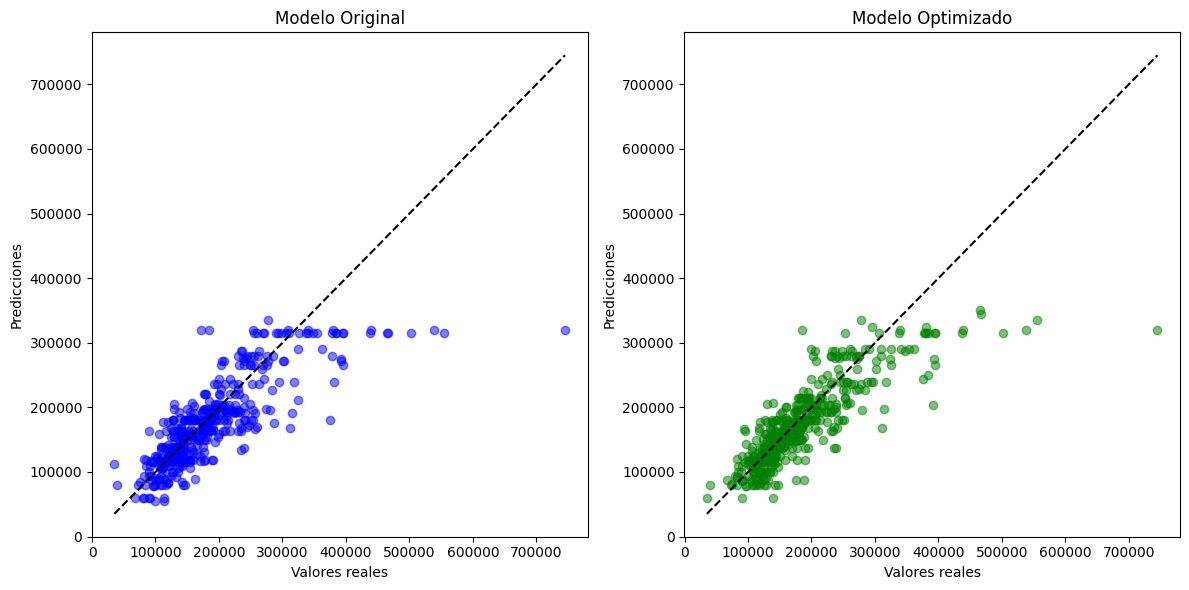

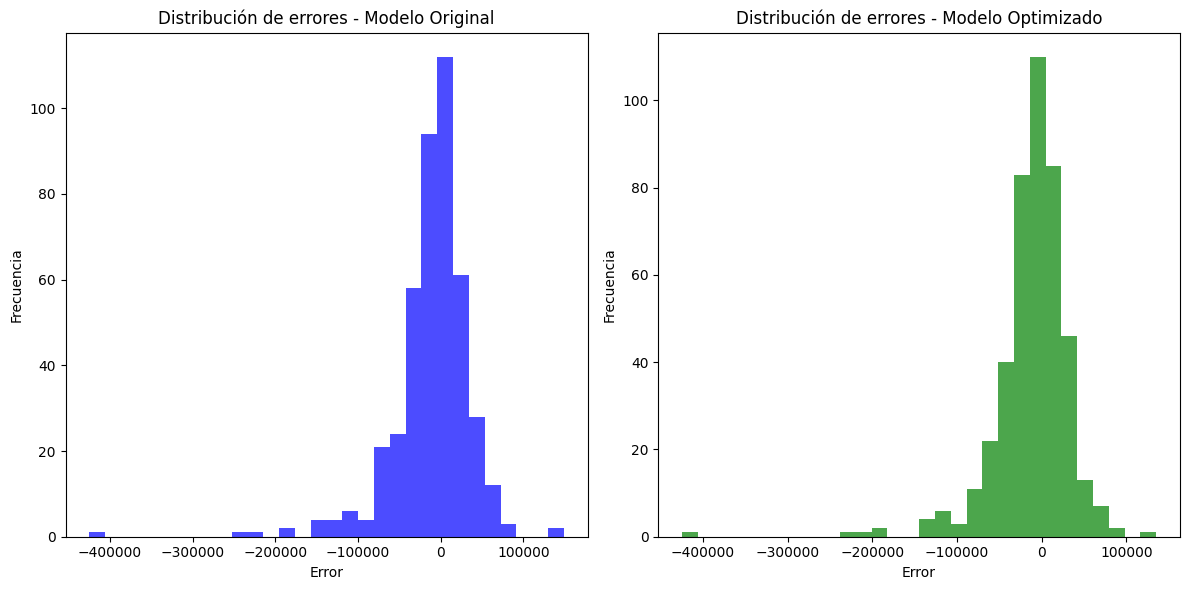

In [3]:
# Optimización de hiperparámetros para el modelo de regresión GaussianNB
print("\n=== Optimización de hiperparámetros para el modelo de regresión ===")

# Definir el espacio de búsqueda para los hiperparámetros
param_grid = {
    'var_smoothing': np.logspace(-10, 0, 11)  # Valores desde 1e-10 hasta 1, escala logarítmica
}

# Crear el GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1
)

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_nb_reg = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"\nMejores hiperparámetros encontrados: {best_params}")
print(f"Mejor puntuación de validación cruzada: {-grid_search.best_score_:.4f} (RMSE)")

# Evaluar el modelo optimizado
y_pred_optimized = best_nb_reg.predict(X_test)

r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
rmse_optimized = root_mean_squared_error(y_test, y_pred_optimized)

print("\n=== Comparación de modelos ===")
print(f"R^2 (original): {r2:.4f} | R^2 (optimizado): {r2_optimized:.4f}")
print(f"MAE (original): {mae:.4f} | MAE (optimizado): {mae_optimized:.4f}")
print(f"RMSE (original): {rmse:.4f} | RMSE (optimizado): {rmse_optimized:.4f}")

# Visualizar la comparación de los errores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Original')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Modelo Original")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimized, color='green', alpha=0.5, label='Optimizado')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Modelo Optimizado")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

plt.tight_layout()
plt.show()

# Comparar distribución de errores
plt.figure(figsize=(12, 6))

errores_optimizados = y_pred_optimized - y_test

plt.subplot(1, 2, 1)
plt.hist(errores, bins=30, color='blue', alpha=0.7)
plt.title("Distribución de errores - Modelo Original")
plt.xlabel("Error")
plt.ylabel("Frecuencia")

plt.subplot(1, 2, 2)
plt.hist(errores_optimizados, bins=30, color='green', alpha=0.7)
plt.title("Distribución de errores - Modelo Optimizado")
plt.xlabel("Error")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## Modelo de clasificación

### Copiar y pegar el modelo

In [4]:
# Importaciones 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
# 1. Cargar los datos
df = pd.read_csv('../../train.csv')
# 2. Crear la variable de respuesta categórica basada en los terciles del precio de venta
tercil_1 = df['SalePrice'].quantile(1/3)
tercil_2 = df['SalePrice'].quantile(2/3)

# Crear la categoría de precio
df['PriceCategory'] = pd.cut(
    df['SalePrice'], 
    bins=[0, tercil_1, tercil_2, float('inf')], 
    labels=['Económica', 'Intermedia', 'Cara']
)

print(f"Tercil 1 (33.33%): ${int(tercil_1):,}")
print(f"Tercil 2 (66.67%): ${int(tercil_2):,}")

# 3. Seleccionar las características para el modelo
selected_features = [
    'OverallQual',    # Calidad general
    'GrLivArea',      # Área habitable
    'GarageCars',     # Capacidad del garaje
    'YearBuilt',      # Año de construcción
    'TotalBsmtSF',    # Superficie total del sótano
    'FullBath',       # Baños completos
    'Neighborhood',   # Vecindario (categórica)
    'ExterQual',      # Calidad del exterior (categórica)
    'KitchenQual',    # Calidad de la cocina (categórica)
    'BsmtQual'        # Calidad del sótano (categórica)
]
# 4. Preparar los datos
X = df[selected_features].copy()
y = df['PriceCategory']

# Manejar valores faltantes en características numéricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='median')
X[numeric_features] = imputer.fit_transform(X[numeric_features])

# Manejar valores faltantes en características categóricas
categorical_features = X.select_dtypes(include=['object']).columns
X[categorical_features] = X[categorical_features].fillna('None')

# Codificar variables categóricas
encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    encoders[feature] = le

# 5. Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Crear y entrenar el modelo Naive Bayes (Gaussiano)
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
# 7. Realizar predicciones
y_pred = gaussian_nb.predict(X_test)

Tercil 1 (33.33%): $139,699
Tercil 2 (66.67%): $190,000


### Optimización 


=== Optimización de hiperparámetros para el modelo de clasificación ===
Fitting 5 folds for each of 11 candidates, totalling 55 fits

Mejores hiperparámetros encontrados: {'var_smoothing': np.float64(1e-05)}
Mejor puntuación de validación cruzada: 0.7896 (Accuracy)

=== Comparación de modelos de clasificación ===
Accuracy (original): 0.7215 | Accuracy (optimizado): 0.7648
Precision (original): 0.7134 | Precision (optimizado): 0.7670
Recall (original): 0.7215 | Recall (optimizado): 0.7648
F1-score (original): 0.7129 | F1-score (optimizado): 0.7639


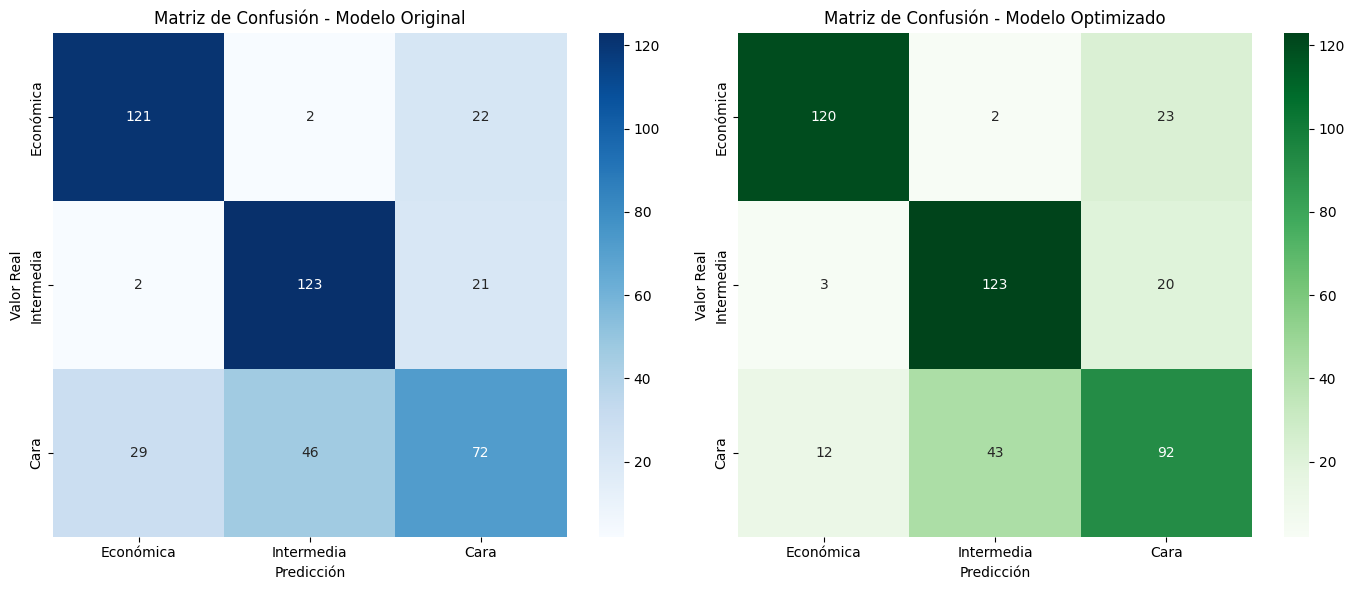


Informe de clasificación - Modelo Original:
              precision    recall  f1-score   support

        Cara       0.80      0.83      0.81       145
   Económica       0.72      0.84      0.78       146
  Intermedia       0.63      0.49      0.55       147

    accuracy                           0.72       438
   macro avg       0.71      0.72      0.71       438
weighted avg       0.71      0.72      0.71       438


Informe de clasificación - Modelo Optimizado:
              precision    recall  f1-score   support

        Cara       0.89      0.83      0.86       145
   Económica       0.73      0.84      0.78       146
  Intermedia       0.68      0.63      0.65       147

    accuracy                           0.76       438
   macro avg       0.77      0.77      0.76       438
weighted avg       0.77      0.76      0.76       438



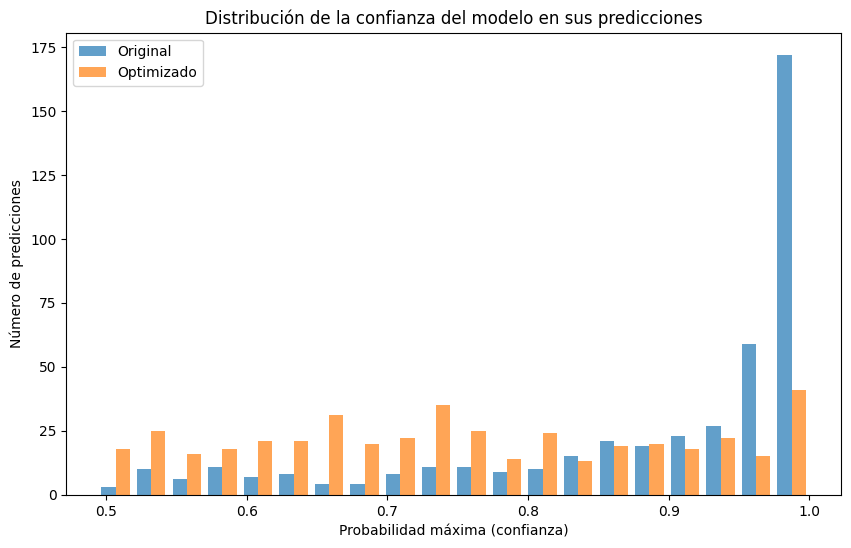

In [5]:
# Optimización de hiperparámetros para el modelo de clasificación GaussianNB
print("\n=== Optimización de hiperparámetros para el modelo de clasificación ===")

# Definir el espacio de búsqueda para los hiperparámetros
param_grid_clf = {
    'var_smoothing': np.logspace(-10, 0, 11),  # Valores desde 1e-10 hasta 1
    # No ajustamos 'priors' ya que se pueden calcular automáticamente del conjunto de entrenamiento
}

# Crear el GridSearchCV con validación cruzada
grid_search_clf = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid_clf,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Usamos accuracy como métrica para clasificación
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=1
)

# Ajustar el modelo a los datos
grid_search_clf.fit(X_train, y_train)

# Obtener el mejor modelo
best_nb_clf = grid_search_clf.best_estimator_
best_params_clf = grid_search_clf.best_params_

print(f"\nMejores hiperparámetros encontrados: {best_params_clf}")
print(f"Mejor puntuación de validación cruzada: {grid_search_clf.best_score_:.4f} (Accuracy)")

# Evaluar el modelo optimizado
y_pred_original = y_pred  # Guardamos las predicciones originales
y_pred_optimized_clf = best_nb_clf.predict(X_test)

# Calcular métricas para ambos modelos
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original, average='weighted')
recall_original = recall_score(y_test, y_pred_original, average='weighted')
f1_original = f1_score(y_test, y_pred_original, average='weighted')

accuracy_optimized = accuracy_score(y_test, y_pred_optimized_clf)
precision_optimized = precision_score(y_test, y_pred_optimized_clf, average='weighted')
recall_optimized = recall_score(y_test, y_pred_optimized_clf, average='weighted')
f1_optimized = f1_score(y_test, y_pred_optimized_clf, average='weighted')

# Mostrar comparación de métricas
print("\n=== Comparación de modelos de clasificación ===")
print(f"Accuracy (original): {accuracy_original:.4f} | Accuracy (optimizado): {accuracy_optimized:.4f}")
print(f"Precision (original): {precision_original:.4f} | Precision (optimizado): {precision_optimized:.4f}")
print(f"Recall (original): {recall_original:.4f} | Recall (optimizado): {recall_optimized:.4f}")
print(f"F1-score (original): {f1_original:.4f} | F1-score (optimizado): {f1_optimized:.4f}")

# Visualizar matrices de confusión
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Matriz de Confusión - Modelo Original")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")

plt.subplot(1, 2, 2)
cm_optimized = confusion_matrix(y_test, y_pred_optimized_clf)
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens',
            xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")

plt.tight_layout()
plt.show()

# Imprimir informes de clasificación
print("\nInforme de clasificación - Modelo Original:")
print(classification_report(y_test, y_pred_original))

print("\nInforme de clasificación - Modelo Optimizado:")
print(classification_report(y_test, y_pred_optimized_clf))

# Visualizar probabilidades de predicción para ver la confianza del modelo
plt.figure(figsize=(10, 6))
prob_original = gaussian_nb.predict_proba(X_test)
prob_optimized = best_nb_clf.predict_proba(X_test)

# Obtener la probabilidad máxima para cada predicción (confianza del modelo)
max_prob_original = np.max(prob_original, axis=1)
max_prob_optimized = np.max(prob_optimized, axis=1)

plt.hist([max_prob_original, max_prob_optimized], bins=20, 
         label=['Original', 'Optimizado'], alpha=0.7)
plt.xlabel('Probabilidad máxima (confianza)')
plt.ylabel('Número de predicciones')
plt.title('Distribución de la confianza del modelo en sus predicciones')
plt.legend()
plt.show()